In [ ]:
## Think that I can do:
# Augment the series by moving the series up and down
# Calculate the Energy as feature
# Calculate the Zero crossing as feature
# Calculate the derivative of the coefficients
# Play around with the coefficients that we keep 
# Use a base model (Bayesian classifier)
# Use a ML model
# Use a RNN

In [1]:
import os
import shutil
import urllib
import zipfile
import glob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import random
import librosa
from scripts.audio_importer import Clip
import os
import numpy as np
import IPython
%matplotlib inline



In [2]:
def download_dataset(name):
    """Download the dataset into current working directory."""
    if not os.path.exists(name):
        os.mkdir(name)
        urllib.request.urlretrieve('https://github.com/karoldvl/{0}/archive/master.zip'.format(name), '{0}/{0}.zip'.format(name))

        with zipfile.ZipFile('{0}/{0}.zip'.format(name)) as package:
            package.extractall('{0}/'.format(name))

        os.unlink('{0}/{0}.zip'.format(name))        
        
# download_dataset('ESC-10')
download_dataset('ESC-50')

/Users/mcavazza/Documents/University/HDA/scripts/audio_importer.py:50: FutureWarning: Pass y=[-9.50637064e-03 -1.22835126e-02 -1.01777676e-02 ...  1.52590219e-05
  1.52590219e-05  1.52590219e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.melspectrogram = librosa.feature.melspectrogram(audio.raw, sr=Clip.RATE, hop_length=Clip.FRAME)


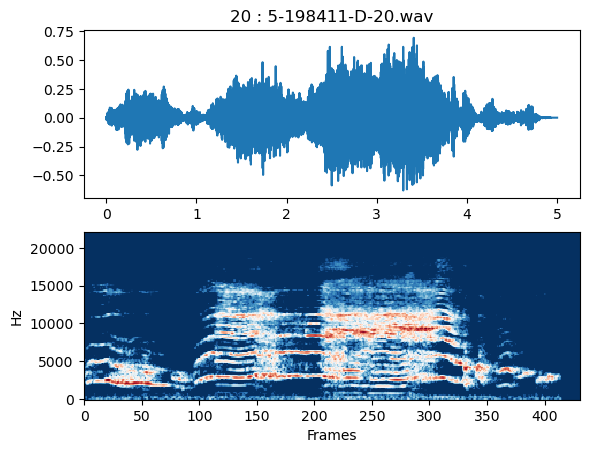

In [3]:

import IPython.display

all_recordings = glob.glob('ESC-50/audio/*.wav')
clip = Clip(all_recordings[random.randint(0, len(all_recordings) - 1)])    

with clip.audio as audio:
    plt.subplot(2, 1, 1)
    plt.title('{0} : {1}'.format(clip.category, clip.filename))
    plt.plot(np.arange(0, len(audio.raw)) / 44100.0, audio.raw)
   
    plt.subplot(2, 1, 2)
    librosa.display.specshow(clip.logamplitude, sr=44100, x_axis='frames', y_axis='linear', cmap='RdBu_r')
    
IPython.display.Audio(filename=clip.path, rate=Clip.RATE)

In [9]:
def load_dataset(path):
    """Load all dataset recordings into a nested list."""
    clips = {}
    
    for directory in sorted(os.listdir('{0}/'.format(path))):
        clip = Clip('{0}/{1}'.format(path, directory))
        clips[directory] = clip

    print('All {0} recordings loaded.'.format(path))            
    
    return clips

In [10]:
x = load_dataset('ESC-50/audio/')

/Users/mcavazza/Documents/University/HDA/scripts/audio_importer.py:50: FutureWarning: Pass y=[1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
 1.52590219e-05 1.52590219e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.melspectrogram = librosa.feature.melspectrogram(audio.raw, sr=Clip.RATE, hop_length=Clip.FRAME)
/Users/mcavazza/Documents/University/HDA/scripts/audio_importer.py:50: FutureWarning: Pass y=[-0.01182574 -0.10334936 -0.14140536 ...  0.06987106  0.0405127
  0.00276188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.melspectrogram = librosa.feature.melspectrogram(audio.raw, sr=Clip.RATE, hop_length=Clip.FRAME)
/Users/mcavazza/Documents/University/HDA/scripts/audio_importer.py:50: FutureWarning: Pass y=[-0.00694285 -0.01249714 -0.0112459  ...  0.21528954 -0.00874342
 -0.28902113] as keyword args. From version 0.10 passing these as positional argu

All ESC-50/audio/ recordings loaded.


/Users/mcavazza/Documents/University/HDA/scripts/audio_importer.py:50: FutureWarning: Pass y=[-3.81475547e-04 -1.06813153e-04 -4.42511635e-04 ...  1.52590219e-05
  1.52590219e-05  1.52590219e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.melspectrogram = librosa.feature.melspectrogram(audio.raw, sr=Clip.RATE, hop_length=Clip.FRAME)


In [ ]:
dt = pd.DataFrame(x, index=[0]).melt(var_name='filename', value_name='audio')
reference_table = pd.read_csv('ESC-50/meta/esc50.csv')
dt = dt.merge(reference_table, on='filename', how='left')

In [38]:
dt.columns

Index(['filename', 'audio', 'fold', 'target', 'category', 'esc10', 'src_file',
       'take'],
      dtype='object')

,filename,audio,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,<0/1-100032-A-0.wav>,1,0,dog,True,100032,A
14,1-110389-A-0.wav,<0/1-110389-A-0.wav>,1,0,dog,True,110389,A
24,1-116765-A-41.wav,<41/1-116765-A-41.wav>,1,41,chainsaw,True,116765,A
54,1-17150-A-12.wav,<12/1-17150-A-12.wav>,1,12,crackling_fire,True,17150,A
55,1-172649-A-40.wav,<40/1-172649-A-40.wav>,1,40,helicopter,True,172649,A
...,...,...,...,...,...,...,...,...
304,1-61252-A-11.wav,<11/1-61252-A-11.wav>,1,11,sea_waves,True,61252,A
310,1-62849-A-38.wav,<38/1-62849-A-38.wav>,1,38,clock_tick,True,62849,A
314,1-64398-A-41.wav,<41/1-64398-A-41.wav>,1,41,chainsaw,True,64398,A
375,1-85362-A-0.wav,<0/1-85362-A-0.wav>,1,0,dog,True,85362,A


In [44]:

def add_subplot_axes(ax, position):
    box = ax.get_position()
    
    position_display = ax.transAxes.transform(position[0:2])
    position_fig = plt.gcf().transFigure.inverted().transform(position_display)
    x = position_fig[0]
    y = position_fig[1]
    
    return plt.gcf().add_axes([x, y, box.width * position[2], box.height * position[3]], facecolor='w')

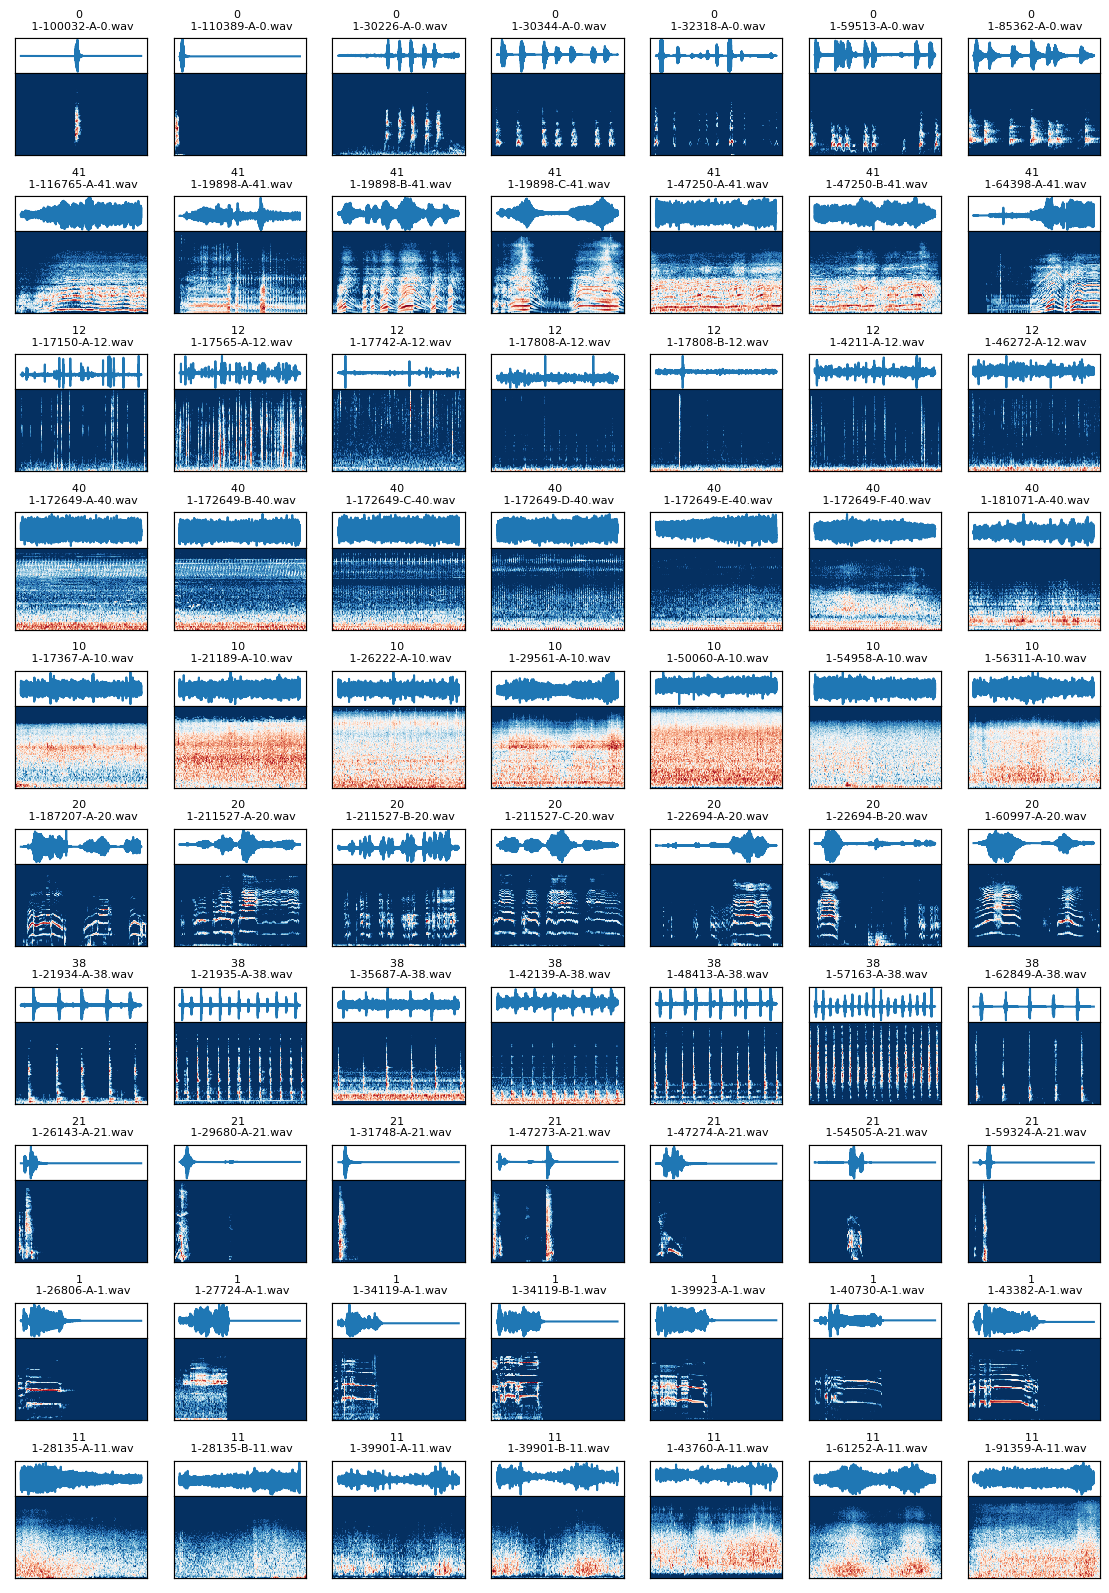

In [49]:
def plot_clip_overview(clip, ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax_waveform = add_subplot_axes(ax, [0.0, 0.7, 1.0, 0.3])
    ax_spectrogram = add_subplot_axes(ax, [0.0, 0.0, 1.0, 0.7])
    
    with clip.audio as audio:
        ax_waveform.plot(np.arange(0, len(audio.raw)) / float(Clip.RATE), audio.raw)
        ax_waveform.get_xaxis().set_visible(False)
        ax_waveform.get_yaxis().set_visible(False)
        ax_waveform.set_title('{0} \n {1}'.format(clip.category, clip.filename), {'fontsize': 8}, y=1.03)
        
        librosa.display.specshow(clip.logamplitude, sr=Clip.RATE, x_axis='time', y_axis='mel', cmap='RdBu_r')
        ax_spectrogram.get_xaxis().set_visible(False)
        ax_spectrogram.get_yaxis().set_visible(False)

categories = 10
clips_shown = 7
f, axes = plt.subplots(categories, clips_shown, figsize=(clips_shown * 2, categories * 2), sharex=True, sharey=True)
f.subplots_adjust(hspace = 0.35)
plot_dt = dt[dt.esc10].groupby('category').head(clips_shown)

for j, c in enumerate(plot_dt.category.unique()):
    for i, row in plot_dt[plot_dt.category == c].reset_index().iterrows():
            plot_clip_overview(row['audio'], axes[j, i])